/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


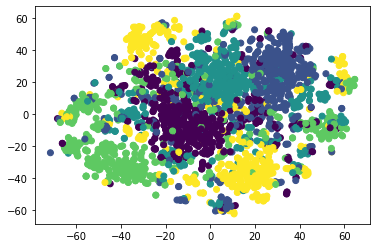

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.manifold import TSNE
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from collections import Counter

# Load the preprocessed data
categories = ["sci.space","talk.politics.guns","rec.motorcycles", "comp.graphics","misc.forsale"]
groups = fetch_20newsgroups(categories = categories)
labels = groups.target
label_names = groups.target_names

# Use the count vectorizer to fit the data
tfidf = TfidfVectorizer(stop_words="english", max_features=500)
data_cleaned_count = tfidf.fit_transform(groups.data)

# Use the t-SNE model to convert high dimensional feature space to 2 dimensional feature space
tsne_model = TSNE(n_components=2, perplexity=40,random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned_count.toarray())

# Display the 2-D plot
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups.target)
plt.show()

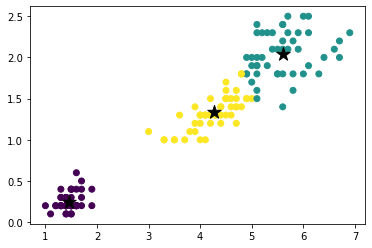

In [2]:
# K-means algo
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1],marker='*', s=200, c='#050505')
plt.show()

k=1, SSE=23.471159607768282
k=2, SSE=2.2485725319349936
k=2, SSE=11.26711683875865
k=3, SSE=1.4219704638282749
k=3, SSE=5.458264143265719
k=3, SSE=9.071807045694346
k=4, SSE=3.102441434925542
k=4, SSE=4.524411898753817
k=4, SSE=6.4291630434120695
k=4, SSE=8.476299880745916
k=5, SSE=1.4219704638282749
k=5, SSE=3.0758914248945968
k=5, SSE=4.513838679731264
k=5, SSE=6.2130822089019855
k=5, SSE=8.263529314616573
k=6, SSE=1.4913787333590987
k=6, SSE=2.9133491971873733
k=6, SSE=4.560745034100367
k=6, SSE=5.764706748410173
k=6, SSE=6.94707724871877
k=6, SSE=8.057299115100708


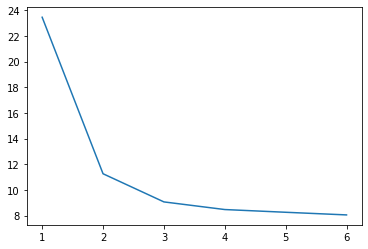

In [3]:
# Fiinding the optimal K using elbow method
k_list = list(range(1, 7))
sse_list = [0] * len(k_list)
for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)
        sse += np.linalg.norm(X[cluster_i] - centroids[i])
        print('k={}, SSE={}'.format(k, sse))
        sse_list[k_ind] = sse

plt.plot(k_list, sse_list)
plt.show()

In [8]:
# K-means algo
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
groups = fetch_20newsgroups(subset='all', categories=categories)
labels = groups.target
label_names = groups.target_names

tfidf_vector = TfidfVectorizer(stop_words='english', max_features=None, max_df=0.5, min_df=2)
data = tfidf_vector.fit_transform(groups.data)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)
clusters = kmeans.labels_
cluster_label = {i: labels[np.where(clusters == i)] for i in range(k)}

terms = tfidf_vector.get_feature_names()
centroids = kmeans.cluster_centers_
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print('cluster_{}: {} samples'.format(cluster, len(index_list)))
    for label_index, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        print('{}: {} samples'.format(label_names[label_index], count))
    print('Top 10 terms:')
    for ind in centroids[cluster].argsort()[-10:]:
        print(' %s' % terms[ind], end="")
    print()

cluster_0: 1626 samples
comp.graphics: 963 samples
sci.space: 364 samples
talk.religion.misc: 210 samples
alt.atheism: 89 samples
Top 10 terms:
 know computer thanks nntp image host posting university graphics com
cluster_1: 112 samples
talk.religion.misc: 72 samples
alt.atheism: 40 samples
Top 10 terms:
 private tourist cookamunga ksand alink com newton apple kent sandvik
cluster_2: 1018 samples
alt.atheism: 669 samples
talk.religion.misc: 342 samples
sci.space: 5 samples
comp.graphics: 2 samples
Top 10 terms:
 think morality jesus sgi don say keith people com god
cluster_3: 631 samples
sci.space: 618 samples
comp.graphics: 8 samples
talk.religion.misc: 4 samples
alt.atheism: 1 samples
Top 10 terms:
 shuttle alaska pat gov toronto digex access henry nasa space
